In [5]:
%load_ext autoreload
%autoreload 2
from readers import GetProcessedInputData
from feature_normalization import NormalizationMethod
from calculate_precision import calculate_results



gt_list, train_signatures, test_signatures = \
  GetProcessedInputData(NormalizationMethod.NONE, is_test_mode=False)


In [ ]:
#For testing only.

#train_signatures = train_signatures[:10]
#test_signatures = test_signatures[:20]

In [6]:
import pickle   
#Retrieve the distance dictionary from a pickle file
file_to_read = open("distances-full-set.pkl", "rb")
distances = pickle.load(file_to_read)
file_to_read.close()

In [25]:
from compute_distances import ComputeDistances

distances = ComputeDistances(train_signatures, test_signatures)

In [7]:
from calculate_precision import calculate_results
# calculate confusion_matrix,precision, recall for threshold 0.25
confusion_matrix, precision, recall = calculate_results(distances, train_signatures, dict(gt_list), 0.25)

In [33]:
# from now on calculates precision,recall for different thresholds
# and builds precision-recall curve

In [8]:
import sklearn.metrics

def precision_recall_curve(distances, train_signatures,gt_list, thresholds):
    precisions = []
    recalls = []
    
    for threshold in thresholds:
        _, precision,recall = calculate_results(distances, train_signatures, dict(gt_list), threshold)
        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls

In [22]:
import numpy as np
thresholds= [0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
precisions, recalls = precision_recall_curve(distances, 
                                             train_signatures,
                                             gt_list, thresholds)
np_recalls = np.asarray([0] + recalls)
np_precisions = np.asarray([1] + precisions)
AP = np.sum((np_recalls[1:] - np_recalls[:-1]) * np_precisions[:-1])
print(f"Average precision is : {AP}")

Average precision is : 0.9657105754107382


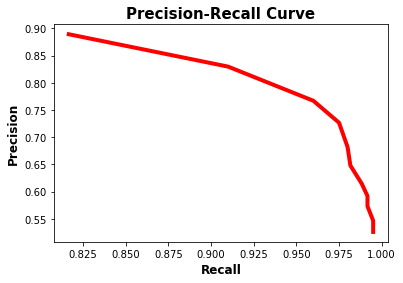

In [37]:
import matplotlib.pyplot as plt
plt.plot(recalls, precisions, linewidth=4, color="red")
plt.xlabel("Recall", fontsize=12, fontweight='bold')
plt.ylabel("Precision", fontsize=12, fontweight='bold')
plt.title("Precision-Recall Curve", fontsize=15, fontweight="bold")
plt.show()

In [ ]:
import pickle   
#Put distances dictionary into a pickle file
file = open("distances-full-set.pkl", "wb")
pickle.dump(distances, file)
file.close()

In [ ]:
import pickle   
#Retrieve the distance dictionary from a pickle file
file_to_read = open("signatures.pkl", "rb")
distances = pickle.load(file_to_read)
file_to_read.close()

In [ ]:
# TODO: write output file sign-ver.csv (slide 14)
import csv
with open("sign-ver.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(outputData)